# Cognitive Stress-Testing of Financial Portfolios

### Import libraries and test Accern service

In [1]:
try:
    from accern import API
except:
    !pip install accern
    from accern import API

     |████████████████████████████████| 61kB 14.0MB/s eta 0:00:01


In [2]:
# Obtain your own token from Accern, this tocken is invalid
token = '9e85232a78fb0af894550971f445836e'
Client = API(token)

In [3]:
from urllib.request import urlopen
import csv
import json
import requests
import re
import os
import io

In [4]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.patches as mpatches

In [5]:
try:
    from ibm_watson import NaturalLanguageUnderstandingV1
except:
    !pip install ibm-watson
    from ibm_watson import NaturalLanguageUnderstandingV1

     |████████████████████████████████| 307kB 18.1MB/s eta 0:00:01
     |████████████████████████████████| 204kB 33.6MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/40/73/8a/809e738908cd1b0d34a383219c49ede9f9fba487584ad3377f
  Stored in directory: /home/dsxuser/.cache/pip/wheels/12/e5/b5/90c69cc81edf5b95cbec373c83c3530266fdae8266037380df
Successfully built ibm-watson ibm-cloud-sdk-core


In [11]:
from ibm_watson.natural_language_understanding_v1 \
  import Features, EntitiesOptions, KeywordsOptions, EmotionOptions, SentimentOptions
    
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

from IPython.display import IFrame, HTML

In [5]:
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 \
  import Features, EntitiesOptions, KeywordsOptions, EmotionOptions, SentimentOptions
    
from watson_developer_cloud import WatsonException 

from IPython.display import IFrame, HTML

Obtain your own IAMAuthenticator from https://cloud.ibm.com/catalog/services/natural-language-understanding

In [12]:
# This key is invalid
natural_language_understanding = NaturalLanguageUnderstandingV1(
    authenticator=IAMAuthenticator('RMMVRlCLOQ3xVZZUjXtyNw6cgb6tUcWwin0hzvp0GrMq'),
    version='2018-11-16'
)

In [13]:
from bs4 import BeautifulSoup
    
#from ibm_watson import WatsonException
 
from bs4.element import Comment

In [15]:
from PIL import Image
try:
    from wordcloud import WordCloud, STOPWORDS
except:
    !pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS

     |████████████████████████████████| 368kB 9.8MB/s eta 0:00:01


<u>**Table of Contents**</u>
 - <a href="#S1">Step 1: Accern API, Reading and Processing Results from Accern</a>
 - <a href="#S2">Step 2: Cognitive Stress Testing Service, Post-Processing Accern Results</a>
 - <a href="#S3">Step 3: Cognitive Stress Testing Service, Preparing ASE Input</a>
 - <a href="#S4">Step 4: Scenario Simulation ASE Service (Predictive Market Scenarios on IBM Cloud)</a>
 - <a href="#S5">Step 5: Output of Scenario Simulation ASE Service</a>
 - <a href="#S6">Step 6: Cognitive Stress Testing Service, Preparing RiskWatch Input</a> 
 - <a href="#S7">Step 7: Valuation RiskWatch Service (Simulated Instrument Analytics on IBM Cloud)</a> 
 - <a href="#S8">Step 8: Output of Valuation RiskWatch Service</a> 
 - <a href="#S9">Step 9: Cognitive Stress Testing Service, Portfolio Stress Testing Results</a>  
 - <a href="#S10">Future Work: Accern and Algo Tools Enhancements</a>   

### Cognitive Stress Testing Workflow Automation

![Cognitive Stress Testing Workflow Automation](http://analytics.romanko.ca/images/Cognitive_stress_testing_diagram.png "Cognitive Stress Testing Workflow Automation")

## <a name="S1">Step 1: Accern API, Reading and Processing Results from Accern</a>

__Define Accern schema and select fields for entity of type "COMMODITY"__.

In [17]:
commodities = [
    'C', 'S', 'B', 'HG', 'CL', 'O', 'RB', 'W'
]

schema = {
    'filters': {
        'entity_type': 'COMMODITY',
        'harvested_at': ['2018-05-01 00:00:00', '2018-08-20 00:00:00']
    }
}

# Get Accern token to be able to run the request 
#response = Client.request(schema)

In [10]:
response

{'first_id': 35979309,
 'last_id': 36149697,
 'signals': [{'author_id': 'S6P3TOBLSWxAlybQjJP5Ia1q3zs=',
   'entity_author_republish_score': 0.0,
   'entity_author_timeliness_score': 6.03,
   'entity_competitors': 'UNASSIGNED',
   'entity_composite_figi': 'UNASSIGNED',
   'entity_country': 'UNASSIGNED',
   'entity_exch_code': 'UNASSIGNED',
   'entity_exchange': 'CBOT',
   'entity_figi': 'UNASSIGNED',
   'entity_indices': 'UNASSIGNED',
   'entity_industry': 'UNASSIGNED',
   'entity_market_sector': 'UNASSIGNED',
   'entity_name': 'Soybeans Futures',
   'entity_region': 'UNASSIGNED',
   'entity_relevance': 90.0,
   'entity_sector': 'Agricultural',
   'entity_security_description': 'UNASSIGNED',
   'entity_security_type': 'UNASSIGNED',
   'entity_sentiment': 81.3999,
   'entity_share_class_figi': 'UNASSIGNED',
   'entity_source_republish_score': 0.0,
   'entity_source_timeliness_score': 6.03,
   'entity_ticker': 'S',
   'entity_type': 'COMMODITY',
   'entity_unique_id': 'UNASSIGNED',
   'ev

Looks like Accern always returns 100 entities.

In [11]:
response['total']

100

__Retrieve commodity sentiment for the last 30 days from Accern service__.

In [12]:
############### Get commodity data ###############
result = pd.DataFrame()
while response['total'] > 0:
    df = pd.DataFrame.from_dict(response['signals'], orient='columns')
    result = result.append(df, ignore_index=True)
    schema['filters']['last_id'] = response['last_id']
    response = Client.request(schema)
    print ("%s - Saving %s responses..." % (datetime.now(), response['total']))

2018-08-24 08:45:40.599344 - Saving 100 responses...
2018-08-24 08:45:41.022368 - Saving 100 responses...
2018-08-24 08:45:41.436392 - Saving 100 responses...
2018-08-24 08:45:41.909419 - Saving 100 responses...
2018-08-24 08:45:42.442449 - Saving 100 responses...
2018-08-24 08:45:42.887475 - Saving 100 responses...
2018-08-24 08:45:43.323500 - Saving 100 responses...
2018-08-24 08:45:43.788526 - Saving 100 responses...
2018-08-24 08:45:44.237552 - Saving 100 responses...
2018-08-24 08:45:44.845587 - Saving 100 responses...
2018-08-24 08:45:45.432620 - Saving 100 responses...
2018-08-24 08:45:45.994653 - Saving 100 responses...
2018-08-24 08:45:46.546684 - Saving 100 responses...
2018-08-24 08:45:47.118717 - Saving 100 responses...
2018-08-24 08:45:47.641747 - Saving 100 responses...
2018-08-24 08:45:48.115774 - Saving 100 responses...
2018-08-24 08:45:48.603802 - Saving 100 responses...
2018-08-24 08:45:49.070828 - Saving 100 responses...
2018-08-24 08:45:49.553856 - Saving 100 respon

In [157]:
# Read sample accern data from CSV file
from os import path
if os.path.exists('http://analytics.romanko.ca/data/commodities.csv'):
    result = pd.read_csv('http://analytics.romanko.ca/data/commodities.csv')
else:
    result = result.drop_duplicates().reset_index(drop=True)
    result.to_csv('commodities.csv', index=False)

In [158]:
result[['entity_name','entity_relevance','entity_sector','entity_sentiment','harvested_at']].head()

,entity_name,entity_relevance,entity_sector,entity_sentiment,harvested_at
0,Soybeans Futures,100.0,Agricultural,0.0,2018-07-20T19:43:51.047Z
1,Soybeans Futures,100.0,Agricultural,-73.6,2018-07-20T19:43:49.279Z
2,Soybeans Futures,100.0,Agricultural,-73.6,2018-07-20T19:43:49.279Z
3,Palladium Futures,100.0,Metals,24.9,2018-07-20T19:20:23.628Z
4,Brent Crude Futures,100.0,Energy,-5.8,2018-07-20T18:38:18.804Z


In [159]:
sentim_data = result

Define name of the risk factor to "watch for".

In [160]:
# Accern name 
name_accern = "Gold Futures"
# Historical Timeseries name
name_hist = "Gold Futures"
# Data directory
data_dir = "Commodities - historical timeseries"

Filter data for the selected risk factor sentiment.

In [161]:
sent_data = sentim_data[sentim_data.entity_name == name_accern]

In [162]:
# Remove elements with a relevance less than 60
sent_data=sent_data[sent_data.entity_relevance > 59]
sent_data[['entity_name','entity_relevance','entity_sector','entity_sentiment','harvested_at','id']].head(10)

,entity_name,entity_relevance,entity_sector,entity_sentiment,harvested_at,id
87,Gold Futures,100.0,Metals,45.8,2018-07-20T02:50:47.121Z,35555041
88,Gold Futures,100.0,Metals,45.8,2018-07-20T02:50:47.121Z,35555040
154,Gold Futures,100.0,Metals,0.0,2018-07-22T01:12:51.275Z,35776272
155,Gold Futures,100.0,Metals,0.0,2018-07-22T01:12:51.275Z,35776271
156,Gold Futures,100.0,Metals,0.0,2018-07-22T01:12:51.275Z,35776270
214,Gold Futures,100.0,Metals,75.0,2018-07-23T21:31:24.634Z,35963231
215,Gold Futures,100.0,Metals,75.0,2018-07-23T21:31:24.634Z,35963230
355,Gold Futures,100.0,Metals,75.0,2018-07-24T02:42:04.179Z,35986534
356,Gold Futures,100.0,Metals,75.0,2018-07-24T02:42:04.179Z,35986533
364,Gold Futures,100.0,Metals,0.0,2018-07-23T23:00:26.475Z,35972235


In [163]:
sent_data['date'] = pd.to_datetime(sent_data['harvested_at']).dt.date
sent_data.date.head(10)

87     2018-07-20
88     2018-07-20
154    2018-07-22
155    2018-07-22
156    2018-07-22
214    2018-07-23
215    2018-07-23
355    2018-07-24
356    2018-07-24
364    2018-07-23
Name: date, dtype: object

In [164]:
group_sent = sent_data.groupby('date')
Daily_Sentiment = group_sent['entity_sentiment'].mean()

In [165]:
Daily_Sentiment

date
2018-07-20    45.800000
2018-07-22     0.000000
2018-07-23    50.033333
2018-07-24    75.000000
2018-07-26     3.750000
2018-07-27   -30.000000
2018-07-30   -10.671429
2018-07-31   -30.650000
2018-08-03    18.500000
2018-08-04    17.440000
2018-08-05     0.000000
2018-08-06    -0.350000
2018-08-07   -33.366667
2018-08-09    24.300000
2018-08-12    75.000000
2018-08-14    87.400000
2018-08-15   -36.753846
2018-08-16    -6.300000
2018-08-17    28.199900
2018-08-19    83.200000
Name: entity_sentiment, dtype: float64

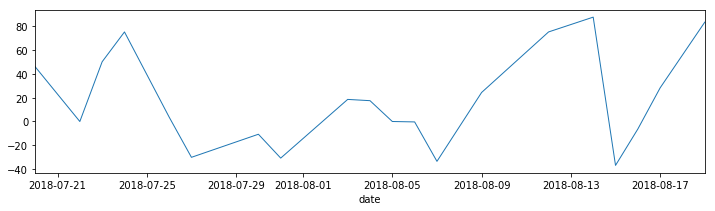

In [166]:
Daily_Sentiment.plot.line(x=Daily_Sentiment.index,figsize=(12,3),lw=1)
plt.show()

In [167]:
Daily_Model = pd.concat([Daily_Sentiment], axis=1, join='inner')

Define end date (today) when significant change to the sentiment happens.

In [168]:
startdate = pd.to_datetime("2018-07-26").date()
enddate = pd.to_datetime("2018-07-27").date()

Daily_Sentiment.loc[startdate:enddate]

date
2018-07-26     3.75
2018-07-27   -30.00
Name: entity_sentiment, dtype: float64

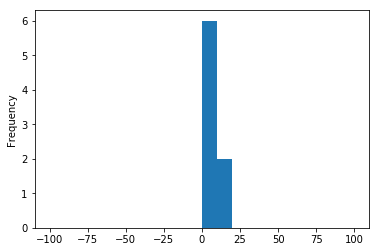

In [169]:
startday_data = sent_data[sent_data.date == startdate]
startday_data['entity_sentiment'].plot.hist(bins=20,range=(-100, 100))

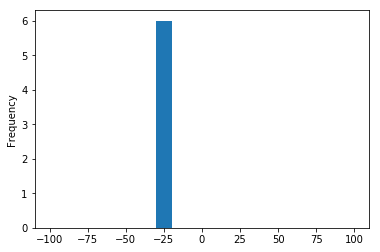

In [170]:
endday_data = sent_data[sent_data.date == enddate]
endday_data['entity_sentiment'].plot.hist(bins=20,range=(-100, 100))

__Display and plot sentiment till the end date__.

In [171]:
Daily_Sentiment.loc[:enddate]

date
2018-07-20    45.800000
2018-07-22     0.000000
2018-07-23    50.033333
2018-07-24    75.000000
2018-07-26     3.750000
2018-07-27   -30.000000
Name: entity_sentiment, dtype: float64

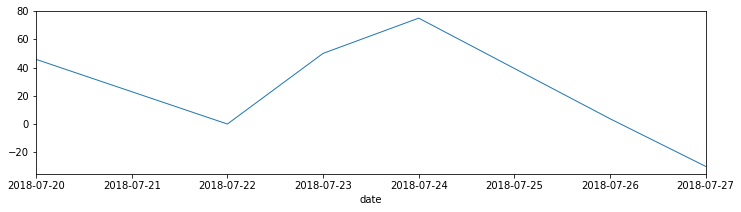

In [172]:
Daily_Sentiment[:enddate].plot.line(x=Daily_Sentiment.index,figsize=(12,3),lw=1)
plt.show()

In [173]:
print('Significant sentiment change detected for "%s" from %.2f%% to %.2f%%' % (name_accern, Daily_Sentiment[startdate], Daily_Sentiment[enddate]))

Significant sentiment change detected for "Gold Futures" from 3.75% to -30.00%


In [174]:
sentiment_change = (Daily_Sentiment[enddate] - Daily_Sentiment[startdate])/100.0
sentiment_change

-0.3375

Detect article IDs for the sentiment on the end date.

In [175]:
sent_data_enddate = sent_data[pd.to_datetime(sent_data['harvested_at']).dt.date == enddate]

In [176]:
sent_data_enddate = sent_data_enddate.drop_duplicates(subset='story_id', keep='first')

In [177]:
sent_data_enddate[['entity_name','entity_relevance','entity_sector','event_group','entity_sentiment','story_id','harvested_at']]

,entity_name,entity_relevance,entity_sector,event_group,entity_sentiment,story_id,harvested_at
665,Gold Futures,100.0,Metals,Analyst Ratings,-30.0,5b5aad68a656f26f043cba04,2018-07-27T05:28:11.866Z
679,Gold Futures,100.0,Metals,Analyst Ratings,-30.0,5b5a957da656f22b7c3cba2e,2018-07-27T03:46:13.179Z
681,Gold Futures,100.0,Metals,Analyst Ratings,-30.0,5b5a9430a656f271023cb9fe,2018-07-27T03:40:35.802Z


In [178]:
event=(sent_data_enddate['event_group']).tolist()[0]
event

'Analyst Ratings'

__Conclusion from Accern output__.

In [179]:
print('On %s we detected a significant sentiment change from %.2f%% to %.2f%% for "%s" due to "%s". We can design a stress scenario for that.' % (enddate, Daily_Sentiment[startdate], Daily_Sentiment[enddate], name_accern,event))

On 2018-07-27 we detected a significant sentiment change from 3.75% to -30.00% for "Gold Futures" due to "Analyst Ratings". We can design a stress scenario for that.


## <a name="S2">Step 2: Cognitive Stress Testing Service, Post-Processing Accern Results</a>

![Cognitive Stress Testing Workflow Automation](http://analytics.romanko.ca/images/Cognitive_stress_testing_diagram.png "Cognitive Stress Testing Workflow Automation")

#### Lets look at the article causing the sentiment change to validate the results returned by Accern.

In [180]:
sent_data_enddate[['id','entity_sentiment','date','story_id']]

,id,entity_sentiment,date,story_id
665,36459496,-30.0,2018-07-27,5b5aad68a656f26f043cba04
679,36452756,-30.0,2018-07-27,5b5a957da656f22b7c3cba2e
681,36452563,-30.0,2018-07-27,5b5a9430a656f271023cb9fe


In [181]:
storyIDlist = sent_data_enddate['story_id'].tolist()
curr_storyID=storyIDlist[0]

In [182]:
curr_storyID

'5b5aad68a656f26f043cba04'

In [183]:
endloop = enddate+timedelta(days=1)

In [184]:
from io import StringIO

df = pd.read_csv('http://analytics.romanko.ca/data/stories_read.csv')

In [185]:
df.drop_duplicates(keep='first', inplace=True)
df.dropna(axis=1, how='all',inplace=True)
#df.shape

In [186]:
row=df[df.article_id == curr_storyID]

In [187]:
row

,Unnamed: 0,id,article_id,story_id,harvested_at,entities_name_1,entities_ticker_1,entities_type_1,type_1,entities_exchange_1,...,story_volume,first_mention,article_type,article_sentiment,overall_source_rank,event_source_rank_1,overall_author_rank,event_impact_score_overall,article_url,date
0,50.0,18542507.0,5b5aad68a656f26f043cba04,5b527fa569fe9f5fa677aa63,2018-07-27T05:28:07.911Z,Gold Futures,GC,COMMODITY,Public,COMEX,...,55.0,False,news,-0.105,8.0,8.0,0.0,42.660986,"""http://www.rttnews.com/2918826/gold-futures-s...",7/27/2018


In [188]:
url=row.iloc[0]['article_url'].strip('\'"')

In [189]:
print(url)

http://www.rttnews.com/2918826/gold-futures-settle-lower.aspx?type=cdt


In [190]:
IFrame(url, width=700, height=550)

#### Lets use Watson NLU to investigate the results.

In [191]:
targets=name_accern.split()

In [192]:
url

'http://www.rttnews.com/2918826/gold-futures-settle-lower.aspx?type=cdt'

In [60]:
r = natural_language_understanding.analyze(
    url=url,
    features=Features(
        sentiment=SentimentOptions(
            targets=[targets[0]]
        )
    )
).get_result()

        
r

{'usage': {'text_units': 1, 'text_characters': 1974, 'features': 1},
 'sentiment': {'targets': [{'text': 'Gold', 'score': 0, 'label': 'neutral'}],
  'document': {'score': -0.381658, 'label': 'negative'}},
 'retrieved_url': 'https://www.rttnews.com/2918826/gold-futures-settle-lower.aspx?type=cdt',
 'language': 'en'}

In [61]:
print("Watson NLU detected a sentiment of %f on %s in this article." % (r['sentiment']['targets'][0]['score'] , r['sentiment']['targets'][0]['text']))

Watson NLU detected a sentiment of 0.000000 on Gold in this article.


#### We will validate the Accern sentiment results by looking at a word cloud of the keywords in the article.

Get text from the article link:

In [62]:
page=requests.get(url)
content=page.text

In [63]:
def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

Convert html text into plain text:

In [64]:
text=text_from_html(content)

Use Watson NLU to get keywords to include in wordcloud:

In [65]:
response = natural_language_understanding.analyze(
    text=text,
    features=Features(
        entities=EntitiesOptions(
            limit=20),
        keywords=KeywordsOptions(
            sentiment=True,
            limit=500)),
        ).get_result()


In [66]:
keywords=[]
relevance=[]
sentiment_score=[]
for i in range(len(response['keywords'])):
    if (response['keywords'][i]['sentiment']['score']):
        keywords.append(response['keywords'][i]['text'])
        relevance.append(response['keywords'][i]['relevance'])
        sentiment_score.append(response['keywords'][i]['sentiment']['score'])
    
for j in range(len(keywords)):
    if "  " in keywords[j]:
        keywords[j]=np.nan
        relevance[j]=np.nan
        sentiment_score[j]=np.nan
        
keywords = [x for x in keywords if str(x) != 'nan']
relevance = [x for x in relevance if str(x) != 'nan']
sentiments = [x for x in sentiment_score if str(x) != 'nan']

In [67]:
print('Number of keywords: %d \n' %len(keywords))

Number of keywords: 84 



Remove entity name from keywords:

In [68]:
name=name_accern.split()
for j in range(len(name)):
    word=(name[j]).lower()
    STOPWORDS.add(word)

print('Number of keywords before cleaning:', len(keywords) )

cleaned=[]
for l in range(len(keywords)):
    temp=keywords[l].lower()
    temp=temp.split(" ")
    word = [word for word in temp if word not in STOPWORDS] 
    words=' '.join(word)
    cleaned.append(words)
    
#print('Number of keywords after cleaning:', len(cleaned) )

Number of keywords before cleaning: 84


In [105]:
def my_tf_color_func(dictionary):
    #word="".join(word)
    def my_tf_color_func_inner(word, font_size, position, orientation, random_state=None, **kwargs):
        return "hsl(%d, 90%%, %d%%)" % ((dictionary[word][0]),dictionary[word][1])
    return my_tf_color_func_inner

In [106]:
keyword_list=[]
split= [] 
split_sentiments=[]
for t in range(len(cleaned)):
    split=cleaned[t].replace('-', ' ').replace('\'s', '').split()
    for l in range(len(split)):
        split_sentiments.append(sentiments[t])
        split[l].replace('-', '')
    keyword_list.extend(split)
     

In [107]:
d={}
for k in range(len(keyword_list)):
    if split_sentiments[k]>0:
        z= 140
        r = np.random.randint(20, 30)
    elif split_sentiments[k]==0:
        z= 240
        r = np.random.randint(40,60)
    elif split_sentiments[k]<0: 
        z= 10
        r = np.random.randint(40,90)
        
    d[keyword_list[k]]=[z,r]

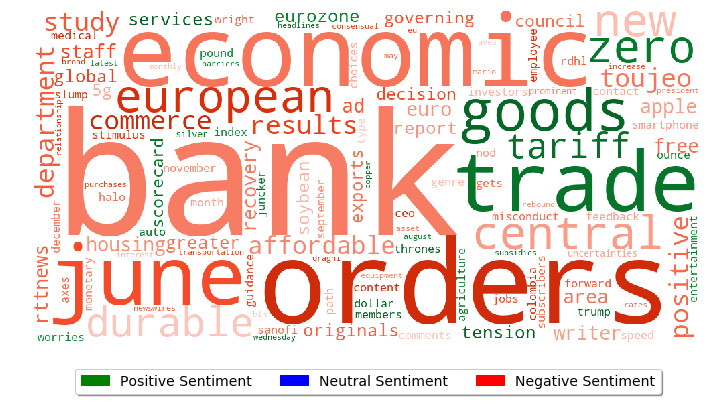

In [108]:
text= ' '.join(cleaned)
stopwords = set(STOPWORDS)
cloud = WordCloud(stopwords = stopwords, background_color='white', width = 1000, height = 500, collocations=True).generate(text)

cloud.recolor(color_func=my_tf_color_func(d))
plt.figure(figsize=(12,7))
plt.imshow(cloud)
plt.axis('off')
green = mpatches.Patch(color='green', label='Positive Sentiment')
blue = mpatches.Patch(color='blue', label='Neutral Sentiment')
red = mpatches.Patch(color='red', label='Negative Sentiment')
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=3, prop={'size': 14}, handles=[green, blue, red])
plt.show()

#### In the above word cloud words with a negative sentiment appear in <span style="color:red"> red </span>, words with a positive sentiment appear in <span style="color:green"> green </span>, and words with a neutral sentiment appear in <span style="color:blue"> blue </span>
We see words like concerns, tension, barriers and trade war within this word cloud to give us an indication of what the article is about. We see that "trade" has a negative sentiment in this article.

In [109]:
print('We will now look at the sentiment by group types - we will use this to analyze why the sentiment changed on %s.' % (enddate))

We will now look at the sentiment by group types - we will use this to analyze why the sentiment changed on 2018-07-27.


In [110]:
sent_data[['entity_sentiment','event_group']].head()

,entity_sentiment,event_group
87,45.8,Economy
88,45.8,Laws And Regulations
154,0.0,Corporate Action
155,0.0,Economy
156,0.0,Financing Activities


In [111]:
sent_data_bar=sent_data.dropna(subset=['event_group']).sort_values('event_group')

group_event = sent_data_bar.groupby('event_group')
Entity_Sentiment = group_event['entity_sentiment'].mean()
Entity_Sentiment=group_event['entity_sentiment'].mean()

In [112]:
Entity_Sentiment

event_group
Analyst Ratings        -25.040000
Business Concerns       56.275000
Company Financials      56.275000
Contracts               -2.081256
Corporate Action         5.731250
Corporate Governance    18.500000
Disaster               -93.333333
Economy                  4.873679
Financing Activities     2.400000
Laws And Regulations    24.725000
Legal Actions           52.183317
Market Performance       4.033333
Product Development      3.428557
Rumors                  50.200000
Stock Valuation         18.500000
Name: entity_sentiment, dtype: float64

In [113]:
sent_data_bar.sort_values('date',inplace=True)

In [114]:
sent_data_bar[['event_group','entity_sentiment']].head()

,event_group,entity_sentiment
87,Economy,45.8
88,Laws And Regulations,45.8
155,Economy,0.0
156,Financing Activities,0.0
154,Corporate Action,0.0


Average entity sentiments across event groups

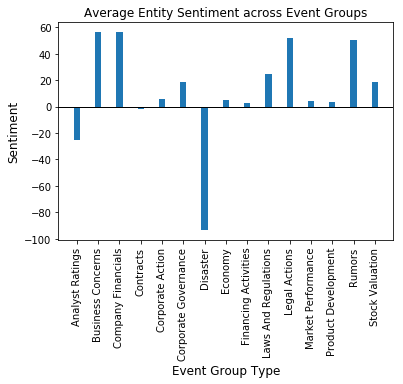

In [115]:
x=Entity_Sentiment.index.tolist()
entity_sent=Entity_Sentiment.tolist()

ax=plt.subplot(111)
ax.bar(x, entity_sent,width=0.3, align='center')
#ax.xaxis_date()
ax.autoscale(tight=False)
#ax.legend('Entity Sentiment')
ax.set_title('Average Entity Sentiment across Event Groups')
ax.set_xlabel("Event Group Type", fontsize=12)
ax.set_ylabel("Sentiment", fontsize=12)
ax.set_xticklabels(x,rotation='vertical')
ax.axhline(linewidth=1, color='k')
plt.show()

Read from CSV file a list of all Accern sentiment risk factors with mapping to ASE risk factors.

In [116]:
df_risk_dr = pd.read_csv('http://analytics.romanko.ca/data/hist-corr-risk-factors.csv',index_col=0)
df_risk_dr.head()

,Accern Sentiment Risk Factor (entity_name),Correlation,ASE Risk Factor,Type,Sector
id,,,,,
1,Brent Crude Futures,0.024186,CX_COS_EN_BrentCrude_IFEU,Commodity,Energy
2,WTI Crude Oil Futures,-0.021280,CX_COS_EN_WTICrude_IFEU,Commodity,Energy
4,Gold Futures,0.254314,CX_COS_ME_Gold_XCEC,Commodity,Metals


## <a name="S3">Step 3: Cognitive Stress Testing Service, Preparing ASE Input</a>

__Create a list of primary risk factors for ASE__ (list consists of "Gold Futures" in our case).

In [117]:
df_ASE = df_risk_dr[df_risk_dr['ASE Risk Factor'].notnull()].filter(['ASE Risk Factor','Correlation','Accern Sentiment Risk Factor (entity_name)'], axis=1)

In [118]:
df_ASE

,ASE Risk Factor,Correlation,Accern Sentiment Risk Factor (entity_name)
id,,,
1,CX_COS_EN_BrentCrude_IFEU,0.024186,Brent Crude Futures
2,CX_COS_EN_WTICrude_IFEU,-0.021280,WTI Crude Oil Futures
4,CX_COS_ME_Gold_XCEC,0.254314,Gold Futures


__Generate JSON input for ASE/STW service on IBM Cloud__. Magnitudes of shocks are computed as *(1 + Change-in-Sentiment x Correlation)*.

In [119]:
for index, row in df_ASE.iterrows():
    if getattr(row, "Accern Sentiment Risk Factor (entity_name)") == name_accern:
        cur_shock = 1 + sentiment_change * getattr(row, "Correlation")
        cur_corr = getattr(row, "Correlation")
        ASE_risk_factor = getattr(row, "ASE Risk Factor")
        RF_scenario = '{"market_change": {"risk_factor": "' + getattr(row, "ASE Risk Factor") + '","shock": ' + str(cur_shock) + '}}'
print(RF_scenario)

{"market_change": {"risk_factor": "CX_COS_ME_Gold_XCEC","shock": 0.914169025}}


In [120]:
print('On %s we detected a significant sentiment change from %.2f%% to %.2f%% for "%s". With corerlation between "%s" return and "%s" sentiment of %.2f%% that drop corresponds to the shock of %.2f%% to "%s" risk factor in ASE.' % (enddate, Daily_Sentiment[startdate], Daily_Sentiment[enddate], name_accern, name_accern, name_accern, 100*cur_corr, 100*(cur_shock-1), ASE_risk_factor))

On 2018-07-27 we detected a significant sentiment change from 3.75% to -30.00% for "Gold Futures". With corerlation between "Gold Futures" return and "Gold Futures" sentiment of 25.43% that drop corresponds to the shock of -8.58% to "CX_COS_ME_Gold_XCEC" risk factor in ASE.


Stress Testing Workbench (STW) Web-GUI

![Stress Testing Workbench](http://analytics.romanko.ca/images/STW.png "Stress Testing Workbench")

## <a name="S4">Step 4: Scenario Simulation ASE Service (Predictive Market Scenarios on IBM Cloud)</a>

Algo Services on IBM Cloud

![Algo Services on IBM Cloud](http://analytics.romanko.ca/images/Financial_Services_on_IBM_Cloud.png "Algo Services on IBM Cloud")

__Submit to ASE on IBM Cloud (Predictive Market Scenarios service)__.

Warning: currently Predictive Market Scenarios service on IBM Cloud handles only shocks to single risk factors and we have to submit only shock to one ASE risk factors.

In [121]:
print(RF_scenario)

{"market_change": {"risk_factor": "CX_COS_ME_Gold_XCEC","shock": 0.914169025}}


Get your own API Key at https://cloud.ibm.com/catalog/services/predictive-market-scenarios

In [132]:
##### ENTER YOUR PREDICTIVE MARKET SCENARIOS SERVICE CREDENTIALS #####
uri = "fss-analytics.mybluemix.net"
api_key = "c8d3c779870cfacf544f0ed5fd75348b9a330ac5f2b71beff88d52da99e4fda2d87e6ef7f2770f212abaf9de42f74bee4819c2d44e6fd7c51a6f6310a749c07b79a34d0e37edca48adff7bcaf31cec80c07b5a2930791afe43e8f4116007cd47e913699aa540221f53c07d691b0db8c2dbe1708d1cd5a1de0cdc44ab4f2dd180" 
#################################################################

url = "https://" + uri + "/api/v1/scenario/generate_predictive"
headers = {'content-type': 'application/json', 'accept': 'application/json', 'X-IBM-Access-Token': api_key}
data = RF_scenario

r = requests.post(url,data=data,headers=headers)

#print(r.text)

## <a name="S5">Step 5: Output of Scenario Simulation ASE Service</a>

__Save output of Predictive Market Scenarios (ASE) simulation service to CSV file__.

In [134]:
f = open('scen_from_ASE.csv', 'w' )
f.write(r.text)
f.close()

## <a name="S6">Step 6: Cognitive Stress Testing Service, Preparing RiskWatch Input</a>

__Test RiskWatch service on IBM Cloud for a single instrument__.

In [135]:
# Royal Bank of Canada
instrum_id = 'CX_US78012KKU06_USD'

ASE simulation CSV file is required as input for RiskWatch service.

In [136]:
files = {'scenario_file': open('scen_from_ASE.csv', 'rb')}

In [137]:
instrum_id

'CX_US78012KKU06_USD'

Get your own API Key at https://cloud.ibm.com/catalog/services/simulated-instrument-analytics

In [138]:
##### ENTER YOUR SIMULATED INSTRUMENT ANALYTICS SERVICE CREDENTIALS #####
uri = "fss-analytics.mybluemix.net"
RW_api_key = "4cf109ef48407293a433823eed0645ef65aea2b8d2cd25c920d141ed992ff0f63d05f4f43ccb4ddf459601c311164e3fc848d50164e276cc54ad733959870ba3fd432f2e0d8db32afba7b819a7601cfc2fa8253045d5344e5b56629af5cc5923bc1e0c6788d53acfa6e1affa0040e0e36c7cd7f5853878c62b43874a0e5ea181"
#################################################################

RW_url = "https://" + uri + "/api/v1/scenario/instrument/" + instrum_id
RW_headers = {'X-IBM-Access-Token': RW_api_key}

In [139]:
rRW = requests.post(RW_url,files=files,headers=RW_headers)

print(rRW.text)

[
  {
    "instrument": "CX_US78012KKU06_USD", 
    "scenario": "Base Scenario (0.0000)", 
    "values": [
      {
        "THEO/Price": "100.7190 USD", 
        "date": "2019/11/06"
      }
    ]
  }, 
  {
    "instrument": "CX_US78012KKU06_USD", 
    "scenario": "CONDITIONAL_1 (1.0000)", 
    "values": [
      {
        "THEO/Price": "100.6982 USD", 
        "date": "2019/11/06"
      }
    ]
  }
]



Try new version of Simulated Instrument Analytics (SIA) service on IBM Cloud at https://cloud.ibm.com/catalog/services/simulated-instruments-analytics-api

## <a name="S7">Step 7: Valuation RiskWatch Service (Simulated Instrument Analytics on IBM Cloud)</a>

Read instrument universe from CSV file.

In [140]:
instrum_universe = pd.read_csv('http://analytics.romanko.ca/data/Instrument_Universe.csv',index_col=0)
instrum_universe.head()

,CX Code ISIN,NAME,SECTOR,CX Asset Type,CX Asset Subtype,THEO/Value,Name,CX Code Reuters,CX Issuer Country,CX Issuer Name
ID,,,,,,,,,,
CX_US7415034039_NSQ,US7415034039,PRICELINE GROUP INC/THE,Consumer Discretionary,Equities,Ordinary shares,"1,724.13 USD",CX_US7415034039_NSQ,PCLN.O,US,THE PRICELINE GROUP INC.
CX_US64110LAM81_USD,US64110LAM81,NETFLIX INC 144A,Communications,Corporate,Services,100.0017 USD,CX_US64110LAM81_USD,64110LAM8=RRPS,US,"NETFLIX, INC."
CX_US46625HRT94_USD,US46625HRT94,JPMORGAN CHASE & CO,Banking,Corporate,Financials,100.0097 USD,CX_US46625HRT94_USD,46625HRT9=RRPS,US,JPMORGAN CHASE & CO.
CX_US01551UAA25_USD,US01551UAA25,ALGECO SCOTSMAN GLOBAL FINANCE PLC 144A,Industrial Other,Corporate,Financials,100.0153 USD,CX_US01551UAA25_USD,01551UAA2=RRPS,GB,ALGECO SCOTSMAN GLOBAL FINANCE PLC
CX_US912828UJ76_USD,US912828UJ76,TREASURY NOTE,Treasuries,Govt/Treasury/Central Bank,Government Notes/Bonds,100.0208 USD,CX_US912828UJ76_USD,912828UJ7=RRPS,US,Federal Government of United States of America


Define portfolio (Portfolio Service on IBM Cloud is not used so far).

In [141]:
##### PUT IN YOUR HOLDINGS HERE #####
Holdings = []
Holdings.append({"asset":"CX_US911365BF09_USD","quantity":2000}) 
Holdings.append({"asset":"CX_US07177MAB90_USD","quantity":1600})
Holdings.append({"asset":"CX_US670001AC05_USD","quantity":1400})
Holdings.append({"asset":"CX_US038522AN85_USD","quantity":400})
Holdings.append({"asset":"CX_US23918KAR95_USD","quantity":700})
Holdings.append({"asset":"CX_US817610AA64_USD","quantity":850})

list_instrum = ''
list_instr = []
hold_instr = []

# Initilialize portfolio
portfolio = {
    "name": "Universe",
    "type":"root",
    "holdings":[]
}
for index, row in instrum_universe.iterrows():
    holding = [h for h in Holdings if h["asset"] == row["Name"]]
    if holding:
        portfolio["holdings"].append(holding[0])
        list_instrum = list_instrum + row["Name"] + ','
        list_instr.append(row["Name"])
        hold_instr.append(holding[0]["quantity"])
    #else:
        #portfolio["holdings"].append({"asset":row["Name"],"quantity":0})

print(json.dumps(portfolio, indent=4, sort_keys=True))

{
    "holdings": [
        {
            "asset": "CX_US038522AN85_USD",
            "quantity": 400
        },
        {
            "asset": "CX_US23918KAR95_USD",
            "quantity": 700
        },
        {
            "asset": "CX_US07177MAB90_USD",
            "quantity": 1600
        },
        {
            "asset": "CX_US817610AA64_USD",
            "quantity": 850
        },
        {
            "asset": "CX_US911365BF09_USD",
            "quantity": 2000
        },
        {
            "asset": "CX_US670001AC05_USD",
            "quantity": 1400
        }
    ],
    "name": "Universe",
    "type": "root"
}


Create Pandas dataframe that contains only instruments from the defined portfolio.

In [142]:
df_portfolio = instrum_universe[instrum_universe.Name.str.contains('|'.join(list_instr))]

In [143]:
df_portfolio.insert(loc=0, column='Holdings', value=hold_instr)

In [144]:
df_portfolio

,Holdings,CX Code ISIN,NAME,SECTOR,CX Asset Type,CX Asset Subtype,THEO/Value,Name,CX Code Reuters,CX Issuer Country,CX Issuer Name
ID,,,,,,,,,,,
CX_US038522AN85_USD,400,US038522AN85,ARAMARK SERVICES INC,Consumer Non-Cyclical,Corporate,Services,100.4875 USD,CX_US038522AN85_USD,038522AN8=RRPS,US,"ARAMARK SERVICES, INC."
CX_US23918KAR95_USD,700,US23918KAR95,DAVITA HEALTHCARE PARTNERS INC,Consumer Non-Cyclical,Corporate,Services,102.125 USD,CX_US23918KAR95_USD,23918KAR9=RRPS,US,DAVITA INC.
CX_US07177MAB90_USD,1600,US07177MAB90,BAXALTA INC,Consumer Non-Cyclical,Corporate,Services,102.6925 USD,CX_US07177MAB90_USD,07177MAB9=RRPS,US,BAXALTA INCORPORATED
CX_US817610AA64_USD,850,US817610AA64,SERVICEMASTER COMPANY LLC 144A,Consumer Cyclical,Corporate,Services,102.9663 USD,CX_US817610AA64_USD,817610AA6=RRPS,US,"THE SERVICEMASTER COMPANY, LLC"
CX_US911365BF09_USD,2000,US911365BF09,UNITED RENTALS NORTH AM,Capital Goods,Corporate,Services,103.5736 USD,CX_US911365BF09_USD,911365BF0=RRPS,US,"UNITED RENTALS (NORTH AMERICA), INC."
CX_US670001AC05_USD,1400,US670001AC05,NOVELIS CORP 144A,Basic Industry,Corporate,Industrials,105.1653 USD,CX_US670001AC05_USD,670001AC0=RRPS,US,NOVELIS CORPORATION


List of instruments to be priced in RiskWatch service.

In [145]:
list_instrum = list_instrum[:-1]

In [146]:
files4 = {
     'instruments': (None, list_instrum, 'application/json'),
     'scenario_file': (os.path.basename('scen_from_ASE.csv'), open('scen_from_ASE.csv', 'rb'), 'application/octet-stream')
}

## <a name="S8">Step 8: Output of Valuation RiskWatch Service</a>

In [147]:
RW1_url = "https://" + uri + "/api/v1/scenario/instruments"
RW1_headers = {'X-IBM-Access-Token': RW_api_key}
rRW1 = requests.post(RW1_url,files=files4,headers=RW1_headers)
#print(rRW1.text)

## <a name="S9">Step 9: Cognitive Stress Testing Service, Portfolio Stress Testing Results</a>

Add RiskWatch scenarios to Pandas dataframe.

In [148]:
# Update the data frame
for i in json.loads(rRW1.text):
    print(i["instrument"], i["values"][0]["THEO/Price"][:-4],i["scenario"])
    df_portfolio.loc[i["instrument"],i["scenario"]] = float(i["values"][0]["THEO/Price"][:-4])

CX_US038522AN85_USD 100.2500 Base Scenario (0.0000)
CX_US07177MAB90_USD 101.9703 Base Scenario (0.0000)
CX_US23918KAR95_USD 100.5000 Base Scenario (0.0000)
CX_US670001AC05_USD 102.7500 Base Scenario (0.0000)
CX_US817610AA64_USD 101.5000 Base Scenario (0.0000)
CX_US911365BF09_USD 102.0000 Base Scenario (0.0000)
CX_US038522AN85_USD 98.1796 CONDITIONAL_1 (1.0000)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


CX_US07177MAB90_USD 99.7109 CONDITIONAL_1 (1.0000)
CX_US23918KAR95_USD 98.3730 CONDITIONAL_1 (1.0000)
CX_US670001AC05_USD 100.7992 CONDITIONAL_1 (1.0000)
CX_US817610AA64_USD 99.4624 CONDITIONAL_1 (1.0000)
CX_US911365BF09_USD 99.9041 CONDITIONAL_1 (1.0000)


In [149]:
df_portfolio[["NAME","Holdings","Base Scenario (0.0000)","CONDITIONAL_1 (1.0000)"]]

,NAME,Holdings,Base Scenario (0.0000),CONDITIONAL_1 (1.0000)
ID,,,,
CX_US038522AN85_USD,ARAMARK SERVICES INC,400,100.2500,98.1796
CX_US23918KAR95_USD,DAVITA HEALTHCARE PARTNERS INC,700,100.5000,98.3730
CX_US07177MAB90_USD,BAXALTA INC,1600,101.9703,99.7109
CX_US817610AA64_USD,SERVICEMASTER COMPANY LLC 144A,850,101.5000,99.4624
CX_US911365BF09_USD,UNITED RENTALS NORTH AM,2000,102.0000,99.9041
CX_US670001AC05_USD,NOVELIS CORP 144A,1400,102.7500,100.7992


In [150]:
BaseScen_col_name = "Base Scenario (0.0000)"
CondScen_col_name = "CONDITIONAL_1 (1.0000)"
BaseUnitVals = df_portfolio[BaseScen_col_name].values
CondUnitVals = df_portfolio[CondScen_col_name].values
x = df_portfolio.Holdings.values

__Compute and display portfolio value before stress and portfolio value after stress__.

In [151]:
portf_init_val = np.dot(BaseUnitVals.T, x)
portf_stress_val = np.dot(CondUnitVals.T, x)

In [152]:
print("Portfolio expected value before stress: $%.2f" % (portf_init_val))
print("Portfolio expected value after stress : $%.2f" % (portf_stress_val))
print("Portfolio expected value changed by %.1f%% under stress" % (100*(portf_stress_val-portf_init_val)/portf_init_val))

Portfolio expected value before stress: $707727.48
Portfolio expected value after stress : $693140.50
Portfolio expected value changed by -2.1% under stress


In [153]:
df_portfolio.insert(loc=len(df_portfolio.columns), column='BaseVals', value=(BaseUnitVals * x))
df_portfolio.insert(loc=len(df_portfolio.columns), column='CondVals', value=(CondUnitVals * x))

__Plot stress testing results__.

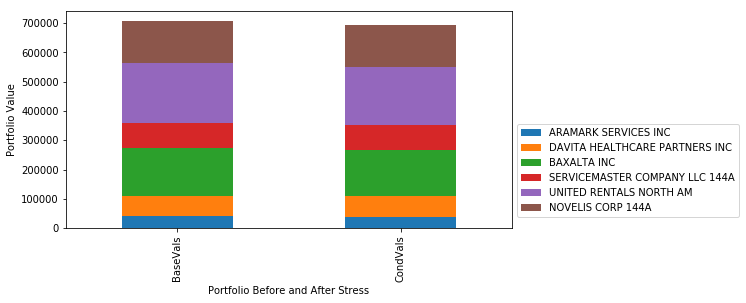

In [154]:
%matplotlib inline
ax = df_portfolio[['BaseVals','CondVals']].T.plot.bar(figsize=(8,4), stacked=True)
ax.set_xlabel("Portfolio Before and After Stress")
ax.set_ylabel("Portfolio Value")
ax.legend(df_portfolio.NAME.values,bbox_to_anchor=(1.0, 0.5))
plt.show()

In the future we can use Monte Carlo scenarios instead of historical scenarios to get distribution of portfolio value/PnL before and after stress instead of getting the mean value/PnL.